Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

Есть ли в данных пропущенные значения?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
london = pd.read_csv(r'london.csv', parse_dates = ['timestamp'])

In [3]:
london

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [4]:
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


Для начала попробуем посмотреть на число поездок по датам и времени. Постройте график, где:

    по оси x – дата (timestamp)
    по оси y – число поездок (cnt)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


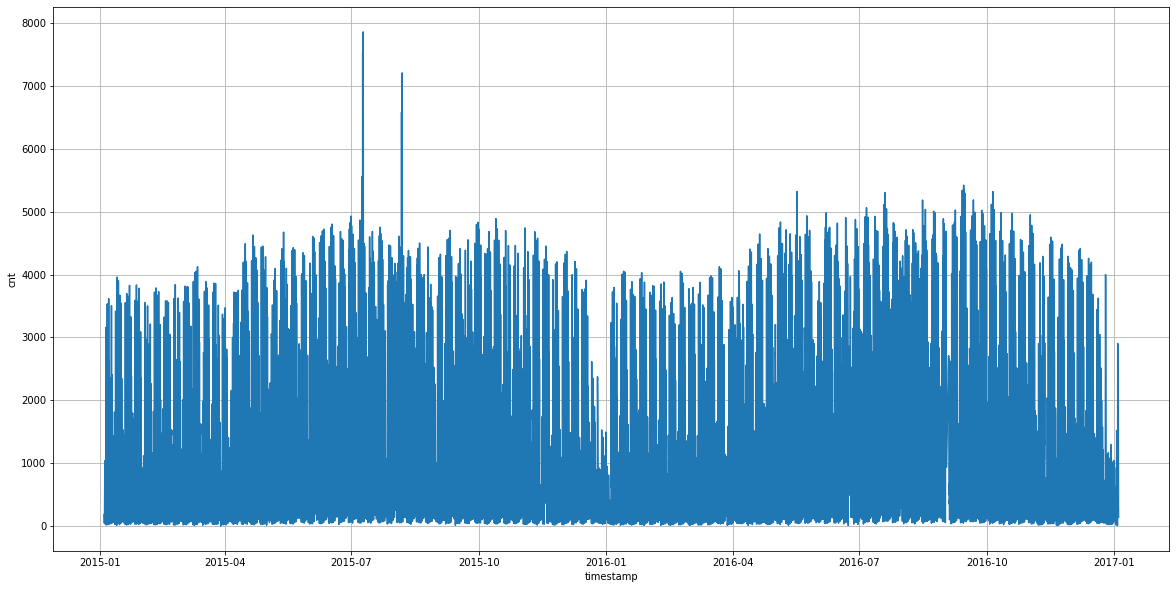

In [5]:
plt.figure(figsize=(20,10))
plt.grid()
sns.lineplot(london.timestamp, london.cnt)

Отлично! Предположим, что данные действительно нужно немного преобразовать. В этом нам поможет resample, с которым вы могли столкнуться в дополнительных темах pandas. Этот метод позволяет преобразовать данные и применить к какому-либо столбцу другой метод (напр. sum). Так можно рассчитать показатели, например, за весь день или месяц, имея данные с точностью до минут. Например, посчитать сумму показателя по дням, имея данные по часам, можно следующим образом:

data.resample(rule='D').column_name.sum() #способ 1
data.resample(rule='D').agg({'column_name':'sum'}) #способ 2, эквивалентный предыдущему

Агрегируйте число поездок по дням и визуализируйте результат. Что вы можете сказать о полученном графике?

In [6]:
london_1 = london.sort_values('timestamp')

In [7]:
london_2 = london_1.set_index('timestamp')

In [8]:
london_2

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


In [9]:
london_3 = london_2.resample(rule = 'D').sum()

In [10]:
london_3

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04,9234,59.5,15.5,2262.5,180.0,69.0,0.0,24.0,72.0
2015-01-05,20372,193.0,161.0,1927.5,212.5,80.0,0.0,0.0,72.0
2015-01-06,20613,188.5,128.0,1893.5,384.0,74.0,0.0,0.0,72.0
2015-01-07,21064,171.5,103.5,1796.5,454.5,60.0,0.0,0.0,69.0
2015-01-08,15601,234.0,187.0,1903.5,491.5,84.0,0.0,0.0,72.0
...,...,...,...,...,...,...,...,...,...
2016-12-30,11566,78.5,25.5,2368.5,216.0,105.0,0.0,0.0,72.0
2016-12-31,11424,178.5,121.0,2183.0,319.5,98.0,0.0,24.0,72.0
2017-01-01,6421,168.0,106.5,2122.5,339.0,150.0,0.0,24.0,72.0


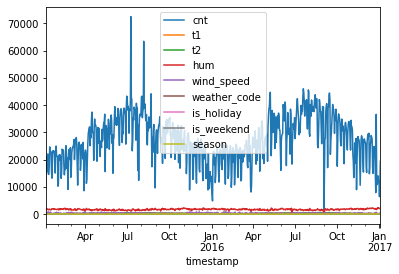

In [11]:
london_3.plot()

Итак, вы обнаружили на графике некоторые скачки. Давайте проверим, что же могло произойти в тот день 🤔.

Для этого разделим дальнейшие действия на несколько этапов:

    сначала посчитаем скользящее среднее, чтобы сгладить ряд
    далее – разницу между наблюдаемыми и сглаженными значениями
    определим верхние и нижние границы 99% доверительного интервала 
    найдем причины аномалий!

На данном шаге возьмите агрегированные данные по дням с предыдущего шага и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [12]:
london_4 = london_3.rolling(window = 3).mean()

In [13]:
london_4.query('timestamp == "2015-07-09"')

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-07-09,50705.0,440.5,437.666667,1356.333333,466.666667,48.666667,0.0,0.0,24.0


Теперь посчитайте разницу между наблюдаемыми и подсчитанными значениями. Далее – примените функцию для подсчета стандартного отклонения. Например:

c = a - b
std = np.std(c)

В качестве ответа введите полученное стандартное отклонение, округленное до 2 знаков после точки.

In [14]:
razn = london_3.cnt - london_4.cnt

In [15]:
razn

timestamp
2015-01-04            NaN
2015-01-05            NaN
2015-01-06    3873.333333
2015-01-07     381.000000
2015-01-08   -3491.666667
                 ...     
2016-12-30   -1116.000000
2016-12-31    -923.333333
2017-01-01   -3382.666667
2017-01-02    1933.666667
2017-01-03    6876.000000
Freq: D, Name: cnt, Length: 731, dtype: float64

In [16]:
np.std(razn).round(2)

4558.59

Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:

    upper_bound – верхняя граница; к скользящим средним прибавляем 2.576∗std
    lower_bound – нижняя граница; вычитаем 2.576∗std

Полученные значения запишите в новые столбцы датафрейма с агрегированными данными.

Чему равно значение верхней границы для последнего наблюдения? Ответ укажите с точностью до 2 знаков после точки.

Note: в качестве std нужно брать стандартное отклонение без округления.

Note 2: вам может понадобиться убрать даты из индекса - иногда из-за этого колонки могут не присваиваться в датафрейм. Вам пригодится .reset_index().

In [17]:
london_4['upper_bound'] = london_4.cnt + 2.576 * np.std(razn)

In [18]:
london_4['lower_bound'] = london_4.cnt - 2.576 * np.std(razn)

In [19]:
 london_4

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,upper_bound,lower_bound
timestamp,,,,,,,,,,,
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,16739.666667,147.000000,101.500000,2027.833333,258.833333,74.333333,0.0,8.0,72.0,28482.585854,4996.747479
2015-01-07,20683.000000,184.333333,130.833333,1872.500000,350.333333,71.333333,0.0,0.0,71.0,32425.919188,8940.080812
2015-01-08,19092.666667,198.000000,139.500000,1864.500000,443.333333,72.666667,0.0,0.0,71.0,30835.585854,7349.747479
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30,12682.000000,73.666667,28.166667,2287.166667,179.666667,67.000000,0.0,0.0,72.0,24424.919188,939.080812
2016-12-31,12347.333333,115.833333,68.333333,2237.000000,227.000000,76.000000,0.0,8.0,72.0,24090.252521,604.414146
2017-01-01,9803.666667,141.666667,84.333333,2224.666667,291.500000,117.666667,0.0,16.0,72.0,21546.585854,-1939.252521


In [20]:
london_4['old_cnt'] = london_3.cnt

In [21]:
london_4

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,upper_bound,lower_bound,old_cnt
timestamp,,,,,,,,,,,,
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9234
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20372
2015-01-06,16739.666667,147.000000,101.500000,2027.833333,258.833333,74.333333,0.0,8.0,72.0,28482.585854,4996.747479,20613
2015-01-07,20683.000000,184.333333,130.833333,1872.500000,350.333333,71.333333,0.0,0.0,71.0,32425.919188,8940.080812,21064
2015-01-08,19092.666667,198.000000,139.500000,1864.500000,443.333333,72.666667,0.0,0.0,71.0,30835.585854,7349.747479,15601
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30,12682.000000,73.666667,28.166667,2287.166667,179.666667,67.000000,0.0,0.0,72.0,24424.919188,939.080812,11566
2016-12-31,12347.333333,115.833333,68.333333,2237.000000,227.000000,76.000000,0.0,8.0,72.0,24090.252521,604.414146,11424
2017-01-01,9803.666667,141.666667,84.333333,2224.666667,291.500000,117.666667,0.0,16.0,72.0,21546.585854,-1939.252521,6421


И наконец – изучим аномально высокие значения! Сначала выведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.

В какой день значение числа аренд оказалось наибольшим? Укажите дату в формате 2020-12-31.

In [22]:
london_4.query('old_cnt > upper_bound')

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,upper_bound,lower_bound,old_cnt
timestamp,,,,,,,,,,,,
2015-07-09,50705.000000,440.500000,437.666667,1356.333333,466.666667,48.666667,0.0,0.0,24.0,62447.919188,38962.080812,72504
2015-08-06,46627.333333,448.666667,448.333333,1546.166667,391.000000,47.666667,0.0,0.0,24.0,58370.252521,34884.414146,63468
2016-09-04,14259.000000,228.500000,228.500000,860.500000,274.833333,45.666667,0.0,12.0,24.0,26001.919188,2516.080812,27512
2016-12-25,19650.666667,251.500000,219.833333,1915.500000,590.833333,68.666667,0.0,16.0,72.0,31393.585854,7907.747479,36653


In [23]:
london_4.query('old_cnt < lower_bound')

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,upper_bound,lower_bound,old_cnt
timestamp,,,,,,,,,,,,
2015-05-14,28709.333333,305.666667,286.500000,1558.833333,450.166667,58.666667,0.0,0.000000,0.000000,40452.252521,16966.414146,15609
2015-07-12,36036.666667,485.833333,481.166667,1415.500000,415.666667,47.000000,0.0,16.000000,24.000000,47779.585854,24293.747479,23240
2015-07-24,31013.666667,426.833333,425.666667,1543.166667,342.166667,63.000000,0.0,0.000000,24.000000,42756.585854,19270.747479,16034
2015-08-24,29529.333333,468.333333,468.166667,1745.833333,340.166667,65.000000,0.0,16.000000,24.000000,41272.252521,17786.414146,17400
2015-11-14,21037.333333,289.333333,263.000000,1827.833333,548.000000,80.333333,0.0,8.000000,48.000000,32780.252521,9294.414146,8898
2016-09-02,26086.333333,306.833333,306.333333,982.000000,228.166667,23.333333,0.0,0.000000,23.333333,37829.252521,14343.414146,0
2016-09-10,31262.000000,471.166667,470.000000,1723.166667,425.333333,58.333333,0.0,8.000000,48.000000,43004.919188,19519.080812,17080
2016-09-16,36193.333333,507.166667,508.333333,1674.333333,302.000000,58.333333,0.0,0.000000,48.000000,47936.252521,24450.414146,21967
2016-11-12,20878.000000,194.666667,149.666667,1882.500000,302.666667,70.333333,0.0,7.666667,47.333333,32620.919188,9135.080812,8990


Проделайте аналогичную операцию для дней, когда число аренд оказалось ниже ожидаемого. В чем может быть причина падения числа аренд 2016-09-02?